## Create In2O3 on Al2O3 (c-plane) interface from Diffraction data in Publication: 
### Growth mechanism and electronic properties of epitaxial In2O3 films on sapphire
* http://dx.doi.org/10.1063/1.3658217


In [1]:
# Import all needed packages
import os
import numpy as np
import matplotlib.pyplot as plt
# import hyperspy.api as hs
# import py4DSTEM
import ase.io
import abtem
import matplotlib
# import mplcyberpunk
# import scipy
# import h5py
# import atomap
# import atomap.api as am

from FunctionPackageOM import User_Functions, Ollis_Functions
# from FunctionPackageOM.cepstral import browser
from FunctionPackageOM.Plot_Style import Plot_Style_OM_activate

# Load custom plot style
Plot_Style_OM_activate(white_bkg_for_visualization=True)

# Note: This line is specific to Jupyter Notebooks
# Uncomment if running in Jupyter
get_ipython().run_line_magic('matplotlib', 'ipympl')


In [1]:
import os
import abtem
import ase.io
import matplotlib.pyplot as plt
import numpy as np
from ase.io import read
from ase.build import surface
from abtem.atoms import pretty_print_transform

from FunctionPackageOM import User_Functions, Ollis_Functions
from FunctionPackageOM.Plot_Style import Plot_Style_OM_activate


# Load custom plot style
Plot_Style_OM_activate(white_bkg_for_visualization=True)

# Note: This line is specific to Jupyter Notebooks
# Uncomment if running in Jupyter
get_ipython().run_line_magic('matplotlib', 'ipympl')



In [2]:
## import the CIF files

fpCIF = '//masc_shared/ag_volz/Oliver_Maßmeyer/CIF_Files'
fnIn2O3 = 'In2O3_mp-22598_symmetrized.cif'
fnAl2O3 = 'Al2O3.cif'

In2O3Atoms = ase.io.read(os.path.join(fpCIF,fnIn2O3))
Al2O3Atoms = ase.io.read(os.path.join(fpCIF,fnAl2O3))

Text(0.5, 0.98, 'sapphire_cell')

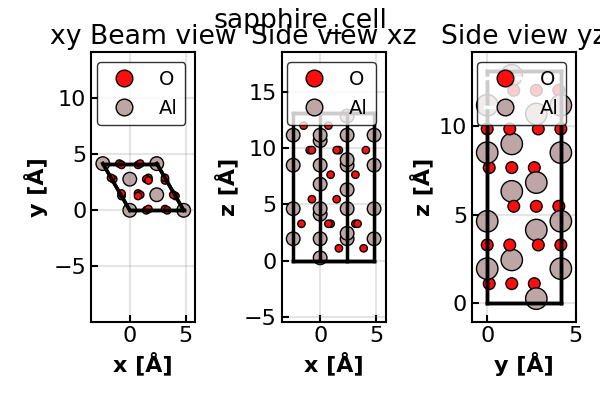

In [3]:
#visualize
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(6, 4))
abtem.show_atoms(Al2O3Atoms, ax=ax1, title="xy Beam view", show_periodic=True, scale=0.5, legend=True)
abtem.show_atoms(Al2O3Atoms, ax=ax2, plane="xz", title="Side view xz", show_periodic=True, scale=0.5,
                 legend=True)
abtem.show_atoms(Al2O3Atoms, ax=ax3, plane="yz", title="Side view yz", show_periodic=True, scale=0.5,
                 legend=True)

fig.tight_layout()
fig.suptitle('sapphire_cell')

Text(0.5, 0.98, 'InSe_cell')

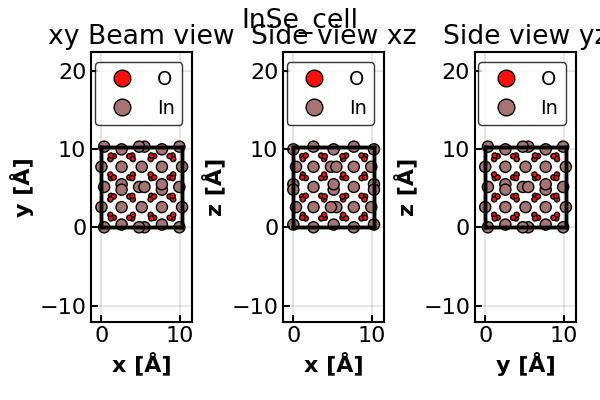

In [4]:
#visualize
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(6, 4))
abtem.show_atoms(In2O3Atoms, ax=ax1, title="xy Beam view", show_periodic=True, scale=0.5, legend=True)
abtem.show_atoms(In2O3Atoms, ax=ax2, plane="xz", title="Side view xz", show_periodic=True, scale=0.5,
                 legend=True)
abtem.show_atoms(In2O3Atoms, ax=ax3, plane="yz", title="Side view yz", show_periodic=True, scale=0.5,
                 legend=True)

fig.tight_layout()
fig.suptitle('InSe_cell')

Text(0.5, 0.98, 'sapphire_cell_01-10')

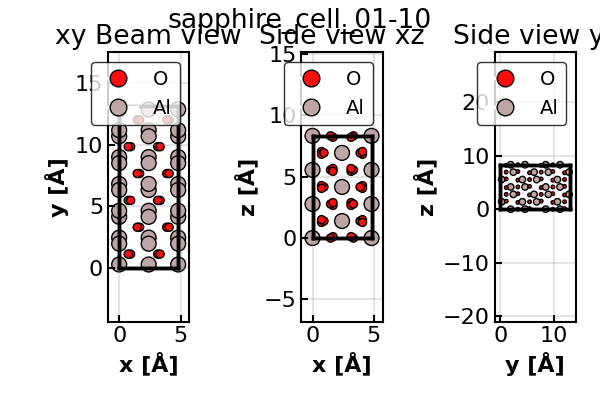

In [19]:
#change to the correct zone axis
Al2O3_01_10 = ase.build.surface(Al2O3Atoms, indices=(1, 0, 0), layers=2, periodic=True)
Al2O3_01_10.translate((0, Al2O3_01_10.cell.lengths()[1] / 2, 0))
Al2O3_01_10.wrap()
 
#visualize
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(6, 4))
abtem.show_atoms(Al2O3_01_10, ax=ax1, title="xy Beam view", show_periodic=True, scale=0.5, legend=True)
abtem.show_atoms(Al2O3_01_10, ax=ax2, plane="xz", title="Side view xz", show_periodic=True, scale=0.5,
                 legend=True)
abtem.show_atoms(Al2O3_01_10, ax=ax3, plane="yz", title="Side view yz", show_periodic=True, scale=0.5,
                 legend=True)

fig.tight_layout()
fig.suptitle('sapphire_cell_01-10')


Text(0.5, 0.98, 'In2O3_[011] rotated')

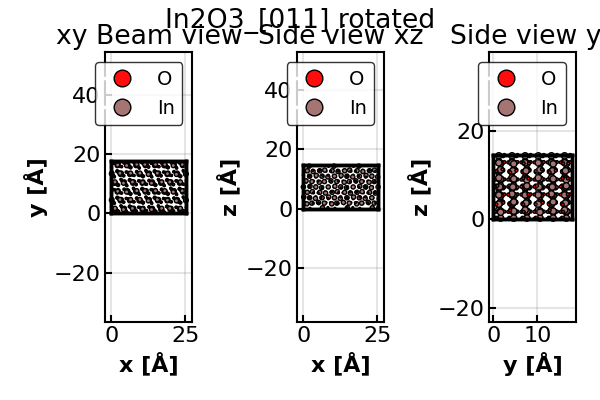

In [109]:
#change to the correct zone axis
In2O3_cell_011 = ase.build.surface(In2O3Atoms, indices=(0, 1, 1), layers=2, periodic=True)
# In2O3_cell_011 = In2O3_cell_011*(2,2,2)

#rotate cell around z-axis
In2O3_cell_011.rotate(-35,'z',rotate_cell=True)

#make it orthogonal
In2O3_cell_011, transform = abtem.orthogonalize_cell(
    In2O3_cell_011, max_repetitions=4, return_transform=True
)

#visualize
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(6, 4))
abtem.show_atoms(In2O3_cell_011, ax=ax1, title="xy Beam view", show_periodic=True, scale=0.5, legend=True)
abtem.show_atoms(In2O3_cell_011, ax=ax2, plane="xz", title="Side view xz", show_periodic=True, scale=0.5,
                 legend=True)
abtem.show_atoms(In2O3_cell_011, ax=ax3, plane="yz", title="Side view yz", show_periodic=True, scale=0.5,
                 legend=True)

fig.tight_layout()
fig.suptitle('In2O3_[011] rotated')

Text(0.5, 0.98, 'In2O3_cell_011Repeated')

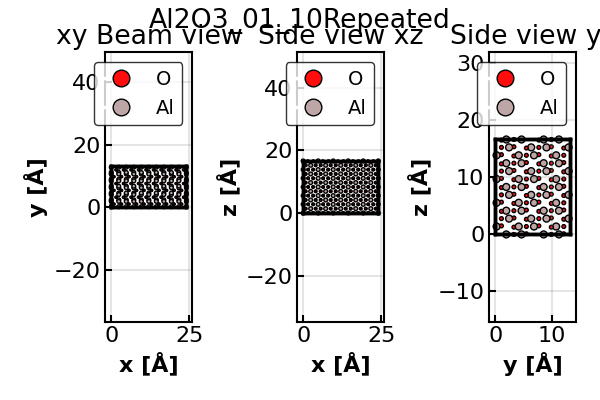

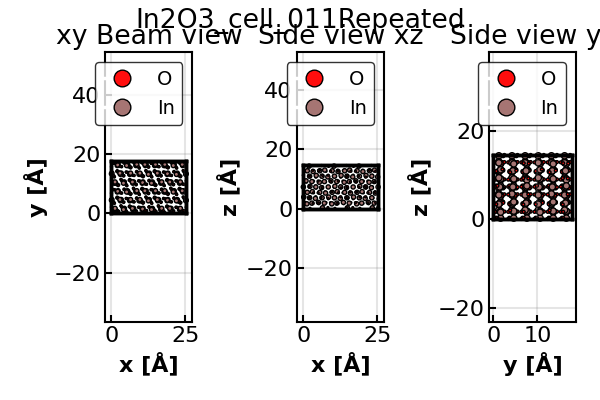

In [116]:
#repeat the cell as much as needed
Al2O3_01_10Repeated = Al2O3_01_10*(5,1,2)
In2O3_cell_011Repeated = In2O3_cell_011

#visualize
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(6, 4))
abtem.show_atoms(Al2O3_01_10Repeated, ax=ax1, title="xy Beam view", show_periodic=True, scale=0.5, legend=True)
abtem.show_atoms(Al2O3_01_10Repeated, ax=ax2, plane="xz", title="Side view xz", show_periodic=True, scale=0.5,
                 legend=True)
abtem.show_atoms(Al2O3_01_10Repeated, ax=ax3, plane="yz", title="Side view yz", show_periodic=True, scale=0.5,
                 legend=True)

fig.tight_layout()
fig.suptitle('Al2O3_01_10Repeated')

#visualize
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(6, 4))
abtem.show_atoms(In2O3_cell_011Repeated, ax=ax1, title="xy Beam view", show_periodic=True, scale=0.5, legend=True)
abtem.show_atoms(In2O3_cell_011Repeated, ax=ax2, plane="xz", title="Side view xz", show_periodic=True, scale=0.5,
                 legend=True)
abtem.show_atoms(In2O3_cell_011Repeated, ax=ax3, plane="yz", title="Side view yz", show_periodic=True, scale=0.5,
                 legend=True)

fig.tight_layout()
fig.suptitle('In2O3_cell_011Repeated')


Text(0.5, 0.98, 'In2O3_On_Al2O3')

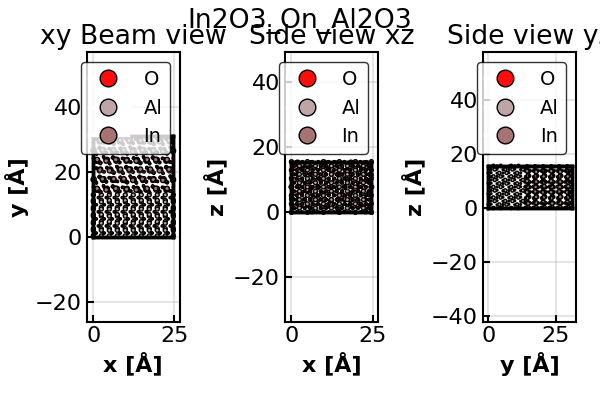

In [117]:
# make stack
In2O3_On_Al2O3 = ase.build.stack(Al2O3_01_10Repeated,In2O3_cell_011Repeated, axis = 1, maxstrain=100)

#check cell
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(6, 4))
abtem.show_atoms(In2O3_On_Al2O3, ax=ax1, title="xy Beam view", show_periodic=True, scale=0.5, legend=True)
abtem.show_atoms(In2O3_On_Al2O3, ax=ax2, plane="xz", title="Side view xz", show_periodic=True, scale=0.5,
                 legend=True)
abtem.show_atoms(In2O3_On_Al2O3, ax=ax3, plane="yz", title="Side view yz", show_periodic=True, scale=0.5,
                 legend=True)
fig.tight_layout()
fig.suptitle('In2O3_On_Al2O3')

In [118]:
## write to CIF file
In2O3_On_Al2O3.write(os.path.join(fpCIF, 'In2O3onAL2O3_PaperOrientation.cif'))

In [ ]:
In2O3_On_Al2O3.positions

In [128]:
maskInterfaceUpper

array([False, False, False, ..., False,  True,  True])

In [137]:
mask_Al_surface

array([False, False, False, ...,  True,  True,  True])

Text(0.5, 0.98, 'interface')

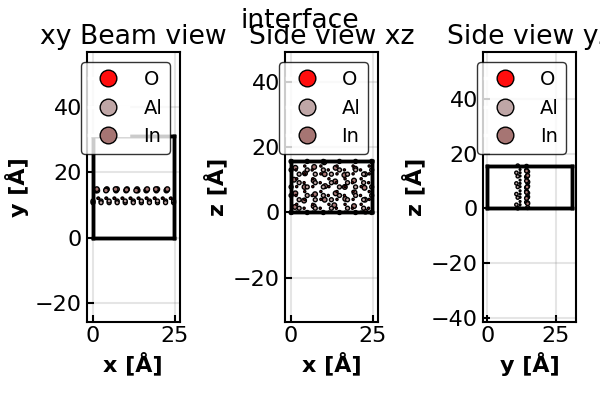

In [155]:
## filter for interface

## replace top layers of Sapphire
interface = In2O3_On_Al2O3.copy()

#select atoms near surface
maskInterfaceLower = interface.positions[:, 1] < 10 
maskInterfaceUpper = interface.positions[:, 1] > 16 
maskInterface = np.logical_or(maskInterfaceLower,maskInterfaceUpper)

#remove Al half layer
mask_Al = interface.numbers == 13
mask_Al_surface = interface.positions[:, 1] > 12
mask_Al_combined = np.logical_and(mask_Al,mask_Al_surface)

#remove oxygen from In2O3 layer
mask_O = interface.numbers == 8
mask_O_surface = interface.positions[:, 1] > 13
mask_O_combined = np.logical_and(mask_O,mask_O_surface)


## set masked positions to nan
interface.positions[maskInterface] = np.nan
interface.positions[mask_Al_combined] = np.nan
interface.positions[mask_O_combined] = np.nan


#check cell
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(6, 4))
abtem.show_atoms(interface, ax=ax1, title="xy Beam view", show_periodic=True, scale=0.5, legend=True)
abtem.show_atoms(interface, ax=ax2, plane="xz", title="Side view xz", show_periodic=True, scale=0.5,
                 legend=True)
abtem.show_atoms(interface, ax=ax3, plane="yz", title="Side view yz", show_periodic=True, scale=0.5,
                 legend=True)
fig.tight_layout()
fig.suptitle('interface')


In [156]:
## save interafce cell

interface.write(os.path.join(fpCIF, 'In2O3onAL2O3_PaperOrientation_interface.cif'))

In [157]:
import platform
print(platform.python_version())

3.11.8
